<a href="https://colab.research.google.com/github/G0nkly/pytorch_sandbox/blob/main/primer/NN/PyTorch_MLP_MNIST10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x


# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10


# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                         transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                        transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = MLP().to(device)
print(sum(p.numel() for p in model.parameters()))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        # Forward pass
        output = model(data)
        loss = criterion(output, target)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}, Loss: {loss.item():.4f}')

# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

cuda
535818
Epoch: 1/10, Batch: 0, Loss: 2.3066
Epoch: 1/10, Batch: 100, Loss: 0.4019
Epoch: 1/10, Batch: 200, Loss: 0.2220
Epoch: 1/10, Batch: 300, Loss: 0.3572
Epoch: 1/10, Batch: 400, Loss: 0.2595
Epoch: 1/10, Batch: 500, Loss: 0.1000
Epoch: 1/10, Batch: 600, Loss: 0.0886
Epoch: 1/10, Batch: 700, Loss: 0.2520
Epoch: 1/10, Batch: 800, Loss: 0.1442
Epoch: 1/10, Batch: 900, Loss: 0.0445
Epoch: 2/10, Batch: 0, Loss: 0.1406
Epoch: 2/10, Batch: 100, Loss: 0.0368
Epoch: 2/10, Batch: 200, Loss: 0.0213
Epoch: 2/10, Batch: 300, Loss: 0.0511
Epoch: 2/10, Batch: 400, Loss: 0.0161
Epoch: 2/10, Batch: 500, Loss: 0.1695
Epoch: 2/10, Batch: 600, Loss: 0.0238
Epoch: 2/10, Batch: 700, Loss: 0.0695
Epoch: 2/10, Batch: 800, Loss: 0.0185
Epoch: 2/10, Batch: 900, Loss: 0.1772
Epoch: 3/10, Batch: 0, Loss: 0.0339
Epoch: 3/10, Batch: 100, Loss: 0.0254
Epoch: 3/10, Batch: 200, Loss: 0.0129
Epoch: 3/10, Batch: 300, Loss: 0.0228
Epoch: 3/10, Batch: 400, Loss: 0.0668
Epoch: 3/10, Batch: 500, Loss: 0.0842
Epoch:

KeyboardInterrupt: 

Test Accuracy: 9.98%


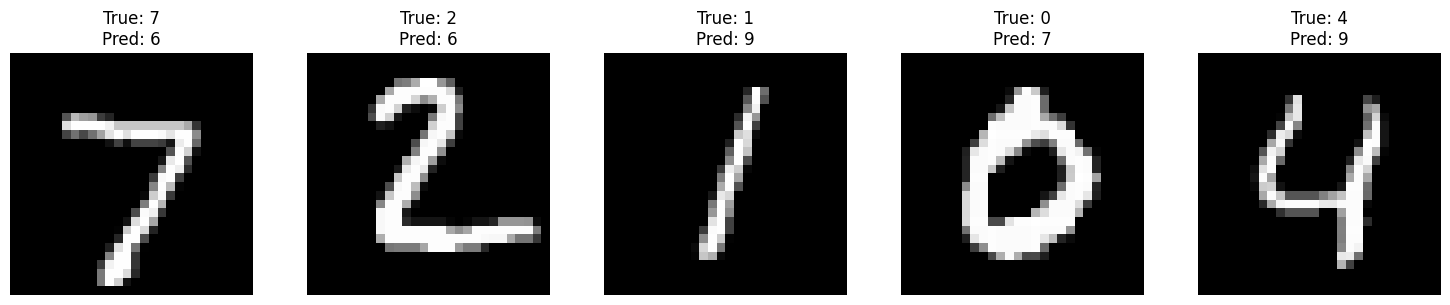

In [ ]:
import matplotlib.pyplot as plt

# Test the model and collect samples for visualization
model.eval()
correct = 0
total = 0
samples_to_plot = []
labels_to_plot = []
predictions_to_plot = []
num_samples_to_plot = 5

model = MLP().to(device)

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

        # Collect samples for plotting
        if len(samples_to_plot) < num_samples_to_plot:
            for i in range(data.size(0)):
                if len(samples_to_plot) < num_samples_to_plot:
                    samples_to_plot.append(data[i].cpu())
                    labels_to_plot.append(target[i].cpu())
                    predictions_to_plot.append(predicted[i].cpu())

print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Plot the samples
fig, axes = plt.subplots(1, num_samples_to_plot, figsize=(15, 3))
for i in range(num_samples_to_plot):
    axes[i].imshow(samples_to_plot[i].squeeze(), cmap='gray')
    axes[i].set_title(f'True: {labels_to_plot[i]}\nPred: {predictions_to_plot[i]}')
    axes[i].axis('off')

plt.tight_layout()

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = sns.load_dataset("titanic")

In [ ]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
